# 11. Sampling Methods

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from prml.rv import Gaussian, Uniform
from prml.sampling import metropolis, metropolis_hastings, rejection_sampling, sir

np.random.seed(1234)

### 11.1.2 Rejection sampling

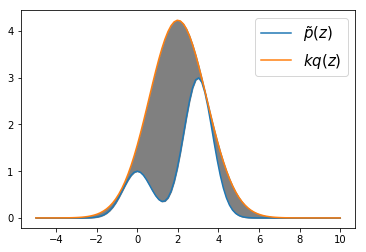

In [2]:
def func(x):
    return np.exp(-x ** 2) + 3 * np.exp(-(x - 3) ** 2)
x = np.linspace(-5, 10, 100)
rv = Gaussian(mu=np.array([2.]), var=np.array([2.]))
plt.plot(x, func(x), label=r"$\tilde{p}(z)$")
plt.plot(x, 15 * rv.pdf(x), label=r"$kq(z)$")
plt.fill_between(x, func(x), 15 * rv.pdf(x), color="gray")
plt.legend(fontsize=15)
plt.show()

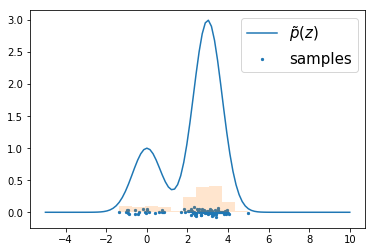

In [3]:
samples = rejection_sampling(func, rv, k=15, n=100)
plt.plot(x, func(x), label=r"$\tilde{p}(z)$")
plt.hist(samples, normed=True, alpha=0.2)
plt.scatter(samples, np.random.normal(scale=.03, size=(100, 1)), s=5, label="samples")
plt.legend(fontsize=15)
plt.show()

### 11.1.5 Sampling-importance-resampling

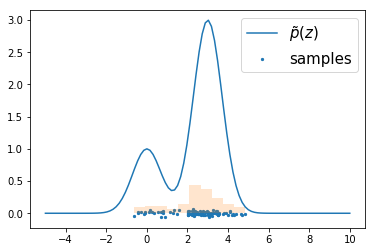

In [4]:
samples = sir(func, rv, n=100)
plt.plot(x, func(x), label=r"$\tilde{p}(z)$")
plt.hist(samples, normed=True, alpha=0.2)
plt.scatter(samples, np.random.normal(scale=.03, size=(100, 1)), s=5, label="samples")
plt.legend(fontsize=15)
plt.show()

## 11.2 Markov Chain Monte Carlo

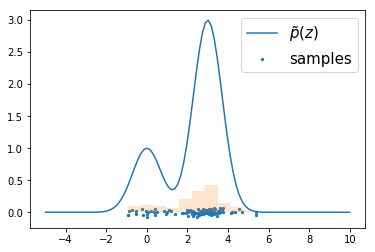

In [5]:
samples = metropolis(func, Gaussian(mu=np.zeros(1), var=np.ones(1)), n=100, downsample=10)
plt.plot(x, func(x), label=r"$\tilde{p}(z)$")
plt.hist(samples, normed=True, alpha=0.2)
plt.scatter(samples, np.random.normal(scale=.03, size=(100, 1)), s=5, label="samples")
plt.legend(fontsize=15)
plt.show()

### 11.2.2 The Metropolis-Hastings algorithm

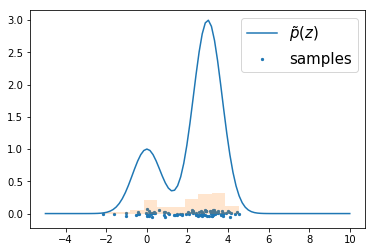

In [6]:
samples = metropolis_hastings(func, Gaussian(mu=np.ones(1), var=np.ones(1)), n=100, downsample=10)
plt.plot(x, func(x), label=r"$\tilde{p}(z)$")
plt.hist(samples, normed=True, alpha=0.2)
plt.scatter(samples, np.random.normal(scale=.03, size=(100, 1)), s=5, label="samples")
plt.legend(fontsize=15)
plt.show()